In [ ]:
from glob import glob

In [ ]:
path='/content/drive/MyDrive/ds_dataset/ds_data'
image=glob(path+'/*')
image

['/content/drive/MyDrive/ds_dataset/ds_data/amritha',
 '/content/drive/MyDrive/ds_dataset/ds_data/nihala',
 '/content/drive/MyDrive/ds_dataset/ds_data/aleena',
 '/content/drive/MyDrive/ds_dataset/ds_data/jincy',
 '/content/drive/MyDrive/ds_dataset/ds_data/roshni',
 '/content/drive/MyDrive/ds_dataset/ds_data/athulya']

In [ ]:
amritha_list=list(glob(path+'/amritha/*'))
nihala_list=list(glob(path+'/nihala/*'))
aleena_list=list(glob(path+'/aleena/*'))
jincy_list=list(glob(path+'/jincy/*'))
roshni_list=list(glob(path+'/roshni/*'))
athulya_list=list(glob(path+'/athulya/*'))

In [ ]:
print(len(amritha_list))
print(len(nihala_list))
print(len(aleena_list))
print(len(jincy_list))
print(len(roshni_list))
print(len(athulya_list))


200
200
200
200
200
200


In [ ]:
input_map={'amritha':amritha_list,'nihala':nihala_list,'aleena':aleena_list,'jincy':jincy_list,'roshni':roshni_list,'athulya':athulya_list}
output_map={'amritha':0,'nihala':1,'aleena':2,'jincy':3,'roshni':4,'athulya':5}

In [ ]:
x=[]
y=[]
import cv2
import numpy as np
for img in input_map:
  path_list=input_map[img]
  #print(path_list)
  for path in path_list:
    img_array=cv2.imread(path)
    #print(img_array)
    img_array_resize=cv2.resize(img_array,(224,224))
    img_array_resize=img_array_resize/255
    img_array_resize=img_array_resize.reshape(224,224,3,1)
    x.append(img_array_resize)
    y.append(output_map[img])
    x_=np.array(x)
    y_=np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_,y_,test_size=0.2)

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Conv3D,MaxPool3D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential


In [ ]:
model=Sequential()
model.add(Conv3D(filters=15,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
model.add(MaxPool3D(pool_size=(2,2,1)))
model.add(Conv3D(filters=10,kernel_size=(2,2,1),activation='relu'))
model.add(MaxPool3D(pool_size=(2,2,1)))

model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=6,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 223, 223, 1, 15)   195       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 111, 111, 1, 15)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 110, 110, 1, 10)   610       
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 55, 55, 1, 10)    0         
 3D)                                                             
                                                                 
 flatten (Flatten)           (None, 30250)             0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

In [ ]:
h=model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))


Epoch 1/5
30/30 [==============================] - 13s 118ms/step - loss: 0.3365 - accuracy: 0.9094 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/5
30/30 [==============================] - 3s 91ms/step - loss: 1.8547e-04 - accuracy: 1.0000 - val_loss: 1.0643e-04 - val_accuracy: 1.0000
Epoch 3/5
30/30 [==============================] - 3s 91ms/step - loss: 3.9231e-05 - accuracy: 1.0000 - val_loss: 4.6152e-05 - val_accuracy: 1.0000
Epoch 4/5
30/30 [==============================] - 3s 91ms/step - loss: 2.5996e-05 - accuracy: 1.0000 - val_loss: 3.2639e-05 - val_accuracy: 1.0000
Epoch 5/5
30/30 [==============================] - 3s 91ms/step - loss: 1.9893e-05 - accuracy: 1.0000 - val_loss: 2.6072e-05 - val_accuracy: 1.0000


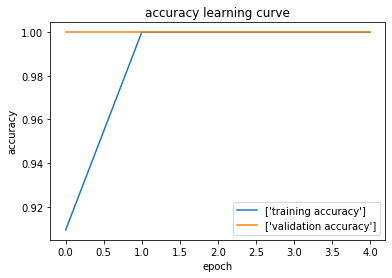

In [ ]:
import matplotlib.pyplot as plt
train_acc=h.history['accuracy']
val_acc=h.history['val_accuracy']
epoch=h.epoch

plt.plot(epoch,train_acc,label=['training accuracy'])
plt.plot(epoch,val_acc,label=['validation accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy learning curve')
plt.legend()

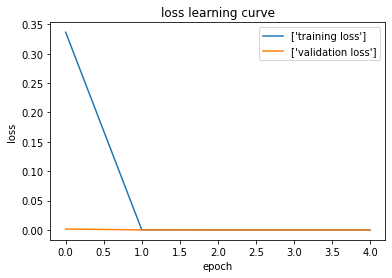

In [ ]:
train_loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch

plt.plot(epoch,train_loss,label=['training loss'])
plt.plot(epoch,val_loss,label=['validation loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss learning curve')
plt.legend()

In [ ]:
from PIL import Image

In [ ]:
Image.open('/content/drive/MyDrive/ds_dataset/ds_data/nihala/nillu1.jpg')

In [ ]:
i_array=cv2.imread('/content/drive/MyDrive/ds_dataset/ds_data/nihala/nillu1.jpg')
dataset=[]
i_array=cv2.resize(i_array,(224,224))
#i_array.shape
np.max(i_array)
i_array=i_array/255
i_array=i_array.reshape(224,224,3,1)
dataset.append(i_array)
test=np.array(dataset)
test.shape
result=model.predict(test)
np.argmax(result)


1

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('face_ds_data.h5')